In [1]:
#%autosave 0
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important } </style>'))

# Huffman's Algorithm for Lossless Data Compression

In [2]:
import graphviz as gv

This notebook presents <em style="color:blue;">coding trees</em>.  Given an alphabet $\Sigma$ of characters, 
we define the set $\mathcal{K}$ of coding trees by induction:

  - $\texttt{Leaf}(c,f) \in \mathcal{K} $ if $c \in \Sigma$ and $f \in \mathbb{N}$

    An expression of the form $\texttt{Leaf}(c,f)$ represent a leaf in a coding tree.  Here  $c$ is a letter
    from the alphabet $\Sigma$ and $f$ is the number of times that the letter $c$ occurs in the string $s$
    that is to be encoded.

  - $\texttt{Node}(l,r) \in \mathcal{K}$ if $l \in\mathcal{K}$ and $r \in \mathcal{K}$

    The expressions $\texttt{Node}(l,r)$ represent the inner nodes of the coding-tree.

The class `CodingTree` is a *superclass* for constructing coding trees.  It has one static variable `sNodeCount`.  This variable is used to equip all nodes with a unique identifier.  This identifier is used to draw the trees using `graphviz`.

Every object of class `CodingTree` has a uniques id `mID` that is stored as a member variable.  

In [3]:
class CodingTree:
    sNodeCount = 0
    
    def __init__(self):
        CodingTree.sNodeCount += 1
        self.mID = CodingTree.sNodeCount
        
    def getID(self):
        return self.mID  # used only by graphviz

The function `make_string` is a helper function that is used to simplify the implementation of `__str__`.
  - `self` is the object that is to be rendered as a string
  - `attributes` is a list of those member variables that are used to produce the string

In [4]:
def _make_string(self, attributes):
        # map the function __str__ to all attributes and join them with a comma
        name = self.__class__.__name__
        return f"{name}({', '.join(map(str, [getattr(self, at) for at in attributes]))})"
    
CodingTree._make_string = _make_string

The method $t.\texttt{toDot}()$ takes a binary trie $t$ and returns a graph that depicts the tree $t$.

In [5]:
def toDot(self):
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    nodeDict = {}
    self._collectIDs(nodeDict)
    for n, t in nodeDict.items():
        if isinstance(t, Leaf):
            dot.node(str(n), label='{' + str(t.mCharacter) + '|' + str(t.mFrequency) + '}') 
        elif isinstance(t, Node):
            dot.node(str(n), label='', shape='point')
        else:
            assert False, f'Unknown node {t}'
    for n, t in nodeDict.items():
        if isinstance(t, Node):
            dot.edge(str(n), str(t.mLeft .getID()), label='0')
            dot.edge(str(n), str(t.mRight.getID()), label='1')
    return dot

CodingTree.toDot = toDot

The method $t.\texttt{collectIDs}(d)$ takes a coding tree $t$ and a dictionary $d$ and updates the dictionary so that the following holds:
$$ d[\texttt{id}] = n \quad \mbox{for every node $n$ in $t$.} $$
Here, $\texttt{id}$ is the unique identifier of the node $n$, i.e. $d$ associates the identifiers with the corresponding nodes.

In [6]:
def _collectIDs(self, nodeDict):
    nodeDict[self.getID()] = self
    if isinstance(self, Node):
        self.mLeft ._collectIDs(nodeDict)
        self.mRight._collectIDs(nodeDict)
        
CodingTree._collectIDs = _collectIDs

The class `Leaf` represents a leaf of the form $\texttt{Leaf}(c, f)$.  It maintains two member variables.
  - $c$ represents the character that is encoded.  This character is stored in the member variable `mCharacter`.
  - $f$ represents the frequency of the character $c$ and is stored in the member variable `mFrequancy`.

In [7]:
class Leaf(CodingTree):
    def __init__(self, c, f):
        CodingTree.__init__(self)
        self.mCharacter = c
        self.mFrequency = f
        
    def __str__(self):
        return _make_string(self, ['mCharacter', 'mFrequency'])
    
    def __lt__(self, other):
        if isinstance(other, Node):
            return True
        return self.mCharacter < other.mCharacter

The class `Node` represents an inner node of the form $\texttt{Node}(l, r)$.  It maintains two member variables:
  - `self.mLeft` is the left subtree $l$,
  - `self.mRight` is the right subtree $r$.

In [8]:
class Node(CodingTree):
    def __init__(self, l, r):
        CodingTree.__init__(self)
        self.mLeft  = l
        self.mRight = r

    def __str__(self):
        return _make_string(self, ['mLeft', 'mRight'])
    
    def __lt__(self, other):
        if isinstance(other, Leaf):
            return False
        return self.mLeft < other.mLeft

## Building a Coding Tree

The module `heapq` provides priority queues.  The api is given at https://docs.python.org/3/library/heapq.html.
The module represents heaps as arrays.

In [9]:
import heapq

Given a set $M$ of pairs of the form $(c, f)$ where $c$ is a character and $f$ it the number of times that this character occurs
in a string $s$ that is to be compressed, the function $\texttt{codingTree}(M)$ uses Hufman's algorithm to construct a coding tree.

In [14]:
H = []
heapq.heappush(H, 7)
heapq.heappush(H, 1)
heapq.heappush(H, 0)
heapq.heappush(H, 6)
H

[0, 6, 1, 7]

In [16]:
a = heapq.heappop(H)
print('a = ', a)
H

a =  0


[1, 6, 7]

In [17]:
def codingTree(M):
    H = []  # empty priority queue
    for c, f in M:
        heapq.heappush(H, (f, Leaf(c, f)))
    while len(H) > 1:
        a = heapq.heappop(H)
        b = heapq.heappop(H)
        heapq.heappush(H, (a[0] + b[0], Node(a[1], b[1])))
    return H[0][1]

Let us test this with a trivial example.

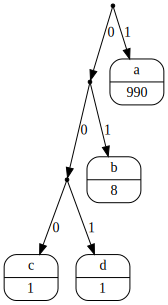

In [19]:
M = { ('a', 990), ('b', 8), ('c', 1), ('d', 1) }
K = codingTree(M)
K.toDot()

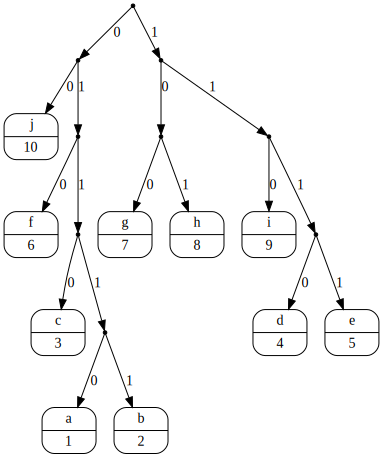

In [20]:
M = { ('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6), ('g', 7), ('h', 8), ('i', 9), ('j', 10) }
K = codingTree(M)
K.toDot()

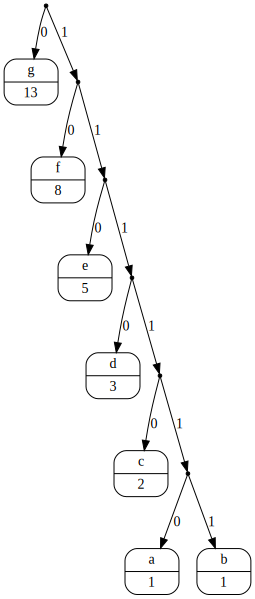

In [21]:
M = { ('a', 1), ('b', 1), ('c', 2), ('d', 3), ('e', 5), ('f', 8), ('g', 13) }
K = codingTree(M)
K.toDot()